<h2>Imports</h2>

In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

<h3>Cargar datos</h3>

In [41]:
dataset = pd.read_csv(r"C:\Users\mota1\machine lerning projects\Fake new detection with ML\data\WELFake_Dataset.csv")
dataset

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [42]:
#borramos todos los nan
dataset.dropna(subset = ['text', 'title'], inplace = True)
#borramos la columna Unnamed: 0
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)


In [52]:
dataset

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


<h3>Limpieza del texto</h3>

In [53]:
input_arr=np.array(dataset['title'])
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 70000):
    review = re.sub('[^a-zA-Z]', ' ', input_arr[i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mota1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Crear el Bag of Words

In [68]:
#transformar las frases a vectores
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(max_features = 10000)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[0:70000, 2].values

<h2>Modelado</h2>

In [70]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

<h3>Naive Bayes</h3>

In [71]:
# Ajustar el clasificador de Naive Bayes en el Conjunto de Entrenamiento
from sklearn.naive_bayes import GaussianNB
navie = GaussianNB()
navie.fit(X_train, y_train)

GaussianNB()

In [89]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = navie.predict(X_test)

# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[6231,  639],
       [3481, 3649]], dtype=int64)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.91      0.75      6870
           1       0.85      0.51      0.64      7130

    accuracy                           0.71     14000
   macro avg       0.75      0.71      0.70     14000
weighted avg       0.75      0.71      0.69     14000



<h3>Logistic Regression</h3>

In [77]:
# Ajustar el clasificador de regresion logistica en el Conjunto de Entrenamiento
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state = 0, max_iter=3000)
lg.fit(X_train, y_train)

LogisticRegression(max_iter=3000, random_state=0)

In [87]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = lg.predict(X_test)

# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cmlg = confusion_matrix(y_test, y_pred)
cmlg

array([[6118,  752],
       [ 699, 6431]], dtype=int64)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      6870
           1       0.90      0.90      0.90      7130

    accuracy                           0.90     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.90      0.90      0.90     14000



<h3>Decision Tree Classification</h3>

In [80]:
# Ajustar el clasificador de Arbol de decision en el Conjunto de Entrenamiento
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [82]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_test)

# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[5950,  920],
       [ 836, 6294]], dtype=int64)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6870
           1       0.87      0.88      0.88      7130

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



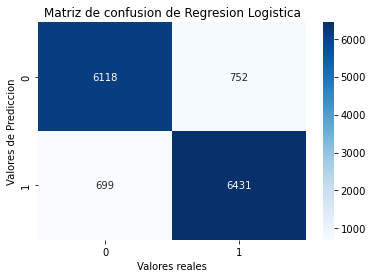

In [88]:
#El modelo mas preciso fue el de Regresion logistica con un 0.90
import seaborn as sns
new_cmlg = pd.DataFrame(cmlg )
sns.heatmap(new_cmlg,cmap= 'Blues', annot = True, fmt='')
plt.xlabel("Valores reales")
plt.ylabel("Valores de Prediccion")
plt.title('Matriz de confusion de Regresion Logistica')
plt.show()